In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.2.0'

In [30]:
m = [i for i in dir(cv2) if '__' in i]
m

['__UMAT_USAGE_FLAGS_32BIT',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__']

#### Color Tracking in live video

In [51]:
def nothing(x):
    pass
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 400)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 400)

cv2.namedWindow('trackbar')

cv2.createTrackbar('LH', 'trackbar', 0, 255, nothing)
cv2.createTrackbar('LS', 'trackbar', 0, 255, nothing)
cv2.createTrackbar('LV', 'trackbar', 0, 255, nothing)
cv2.createTrackbar('UH', 'trackbar', 255, 255, nothing)
cv2.createTrackbar('US', 'trackbar', 255, 255, nothing)
cv2.createTrackbar('UV', 'trackbar', 255, 255, nothing)
try:
    while(1):
        ret, frame = cap.read()
        if ret == True:
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            
            l_h = cv2.getTrackbarPos('LH', 'trackbar')
            l_s = cv2.getTrackbarPos('LS', 'trackbar')
            l_v = cv2.getTrackbarPos('LV', 'trackbar')
            u_h = cv2.getTrackbarPos('UH', 'trackbar')
            u_s = cv2.getTrackbarPos('US', 'trackbar')
            u_v = cv2.getTrackbarPos('UV', 'trackbar')
            
            l_b = np.array([l_h,l_s,l_v])
            u_b = np.array([u_h,u_s,u_v])
            
            mask = cv2.inRange(hsv, l_b,u_b) # Checks whether hsv is in range of l_b and u_b. if true makes the value 255 else 0.
            res = cv2.bitwise_and(frame,frame,mask = mask)# mask restricts the pixels with 0 value
            
            cv2.imshow('frame',frame)
            cv2.imshow('mask',mask)
            cv2.imshow('Result',res)
            
            if cv2.waitKey(1) > 0:
                break
        else:
            break
finally:
    cap.release()
    cv2.destroyAllWindows()
            

#### Threshold mask

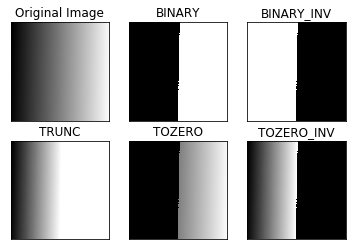

In [24]:
img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Adaptive Threshold

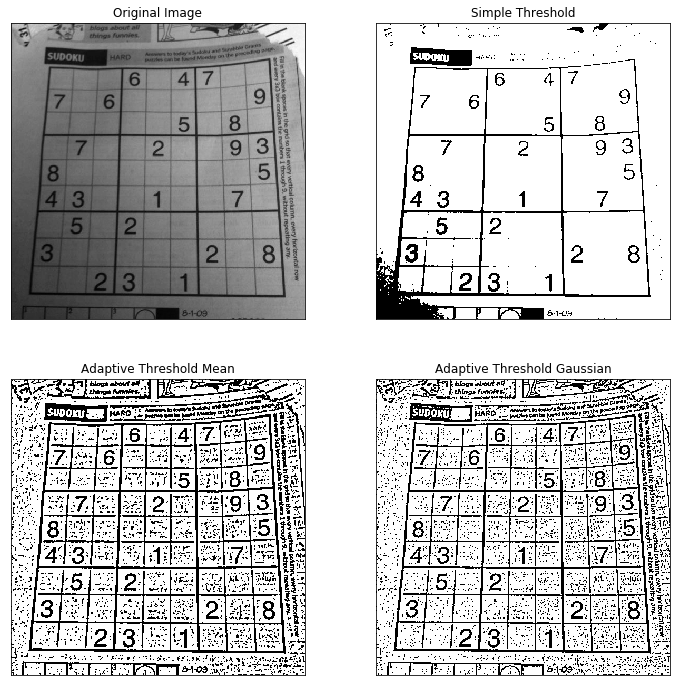

In [26]:
img = cv2.imread('sudoku.png',0)
ret,thresh1 = cv2.threshold(img,55,255,cv2.THRESH_BINARY)
adThsh1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 2)
adThsh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 2)
titles = ['Original Image','Simple Threshold','Adaptive Threshold Mean','Adaptive Threshold Gaussian']
imgs = [img, thresh1, adThsh1, adThsh2]

plt.figure(figsize=(12,12))
for i in range(len(imgs)):
    plt.subplot(2,2,i+1),plt.imshow(imgs[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Thresholding a live video

In [58]:
cap = cv2.VideoCapture(0)
try:
    while(1):
        ret, frame = cap.read()
        if ret == True:
            gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            adThsh1 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 2)
            cv2.imshow('frame',frame)
            cv2.imshow('frame2',adThsh1)
            if cv2.waitKey(1) > 0:
                break
        else:
            break
finally:
    cap.release()
    cv2.destroyAllWindows()

#### Using Matplotlib for showing images

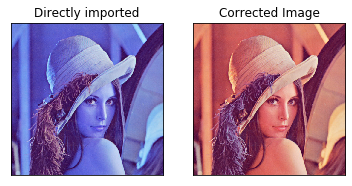

In [45]:
img = cv2.imread('Lena.jpg')

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Directly imported')
plt.xticks([]),plt.yticks([])

corrected_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#As matplotlib uses RGB format and opencv uses BGR format
plt.subplot(1,2,2)
plt.imshow(corrected_img)
plt.title('Corrected Image')
plt.xticks([]),plt.yticks([])

plt.show()